In [33]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

In [34]:
# 70-85N
# 120-180W
# area average (*cos)
# tilføj dec, jan, feb

In [35]:
### CHOOSE 3 MONTHS OF INVESTIGATION:
MONTHS = "JJA" # JJA or JFM
AREA = "Beaufort" # Arctic or "Beaufort"

if AREA == "Beaufort":
    file_phase1 = Path("data/yearly_average_Beaufort_phase1")
    file_phase2 = Path("data/yearly_average_Beaufort_phase21")
elif AREA == "Arctic":
    file_phase1 = Path("data/yearly_average_phase1")
    file_phase2 = Path("data/yearly_average_phase21")
else:
    ValueError("Area may only be 'Beaufort' or 'Arctic'")

data_types = ["sea_level_anomaly_raw", "sea_level_anomaly", "sea_level_anomaly_filtered"]
if MONTHS == "JJA":
    months_loader = "[6-8]"
    months = ["June", "July", "August"]
elif MONTHS == "JFM":
    months_loader = "[1-3]"
    months = ["January", "February", "March"]

data_phase1 = [xr.open_dataset(file) for file in file_phase1.glob(f"*{months_loader}.nc")]
data_phase2 = [xr.open_dataset(file) for file in file_phase2.glob(f"*{months_loader}.nc")]

In [36]:
def three_month_average(data_phase, data_types):
    JJA_average = []
    for data_type in data_types:
        averages = []
        for data in data_phase:
            yearly = []
            for idx in range(len(data.time)):
                yearly.append(data[data_type][idx].values)
            averages.append(yearly)
        JJA_average.append(np.nanmean(averages, axis=0))
    return JJA_average

In [37]:
JJA_average1 = three_month_average(data_phase1, data_types)
JJA_average2 = three_month_average(data_phase2, data_types)
years1 = [year[:4] for year in data_phase1[0].time.values]
years2 = [year[:4] for year in data_phase2[0].time.values]

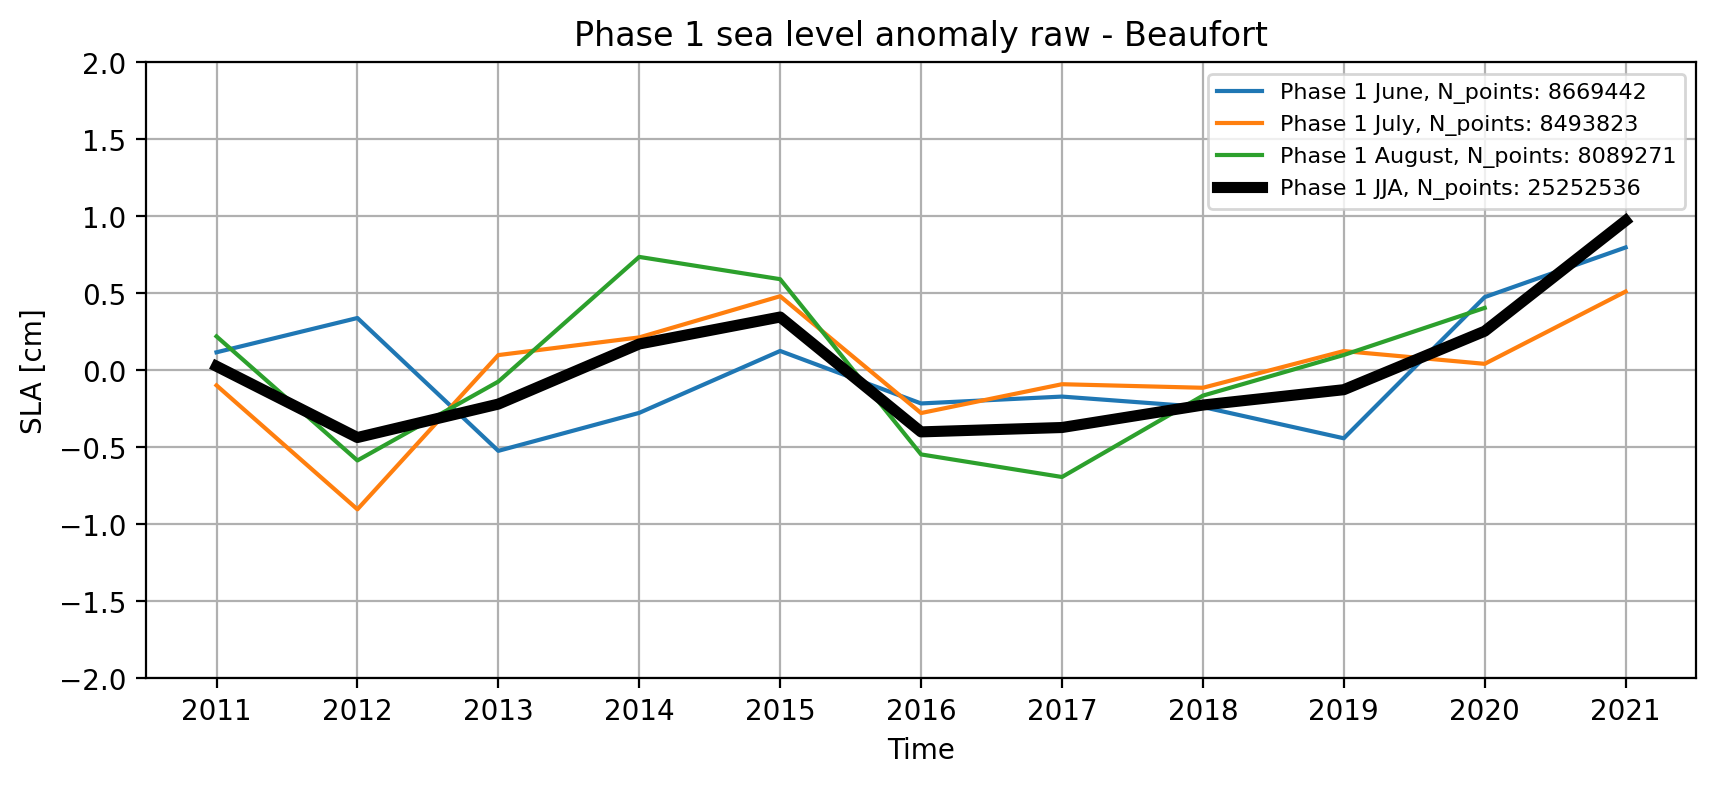

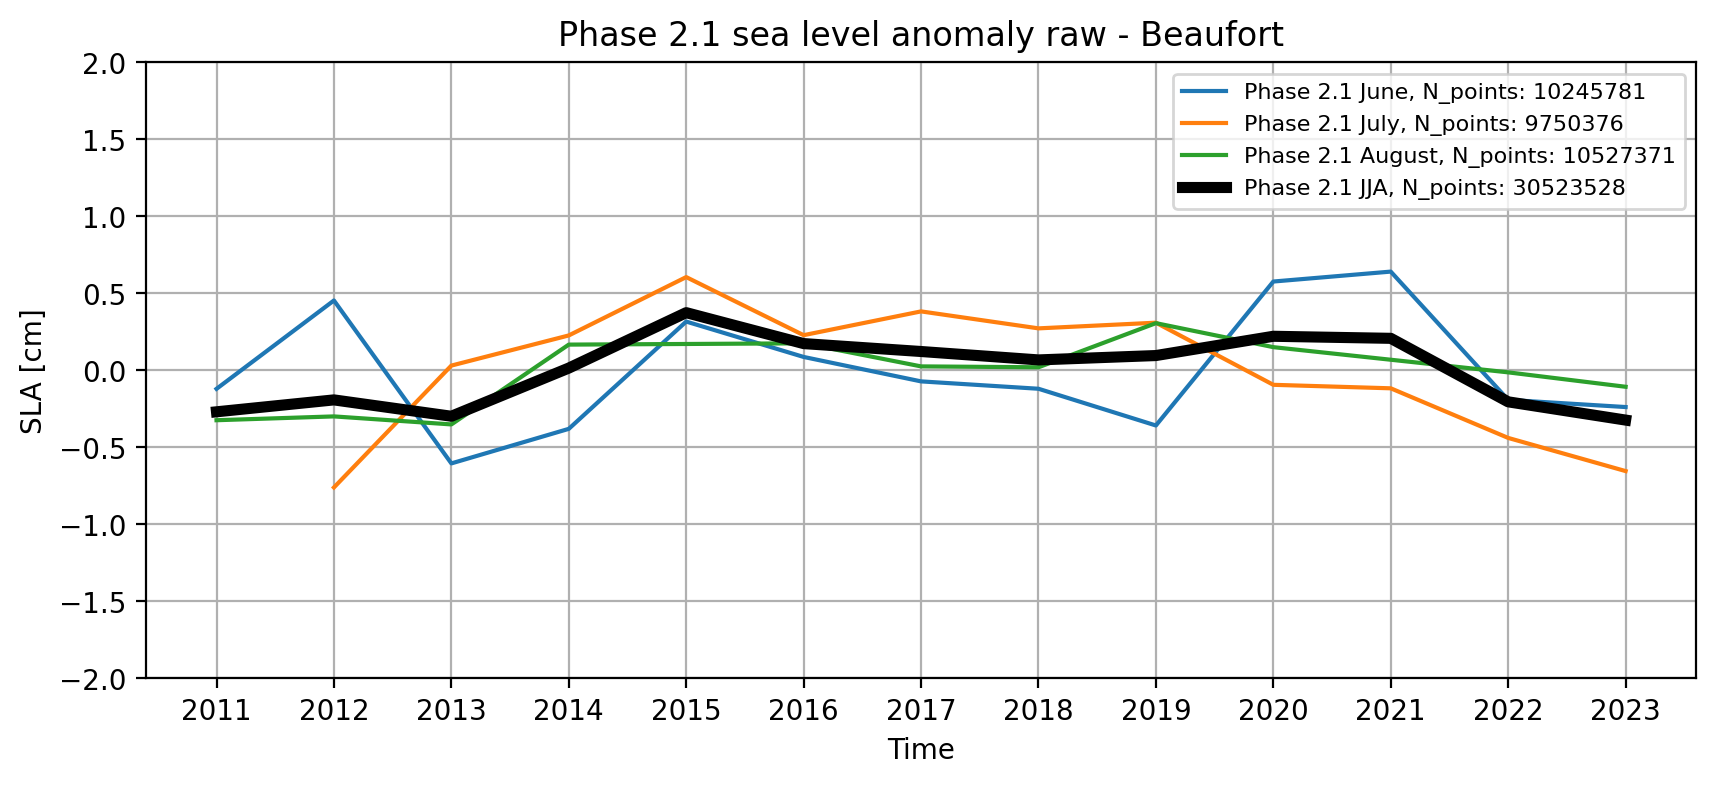

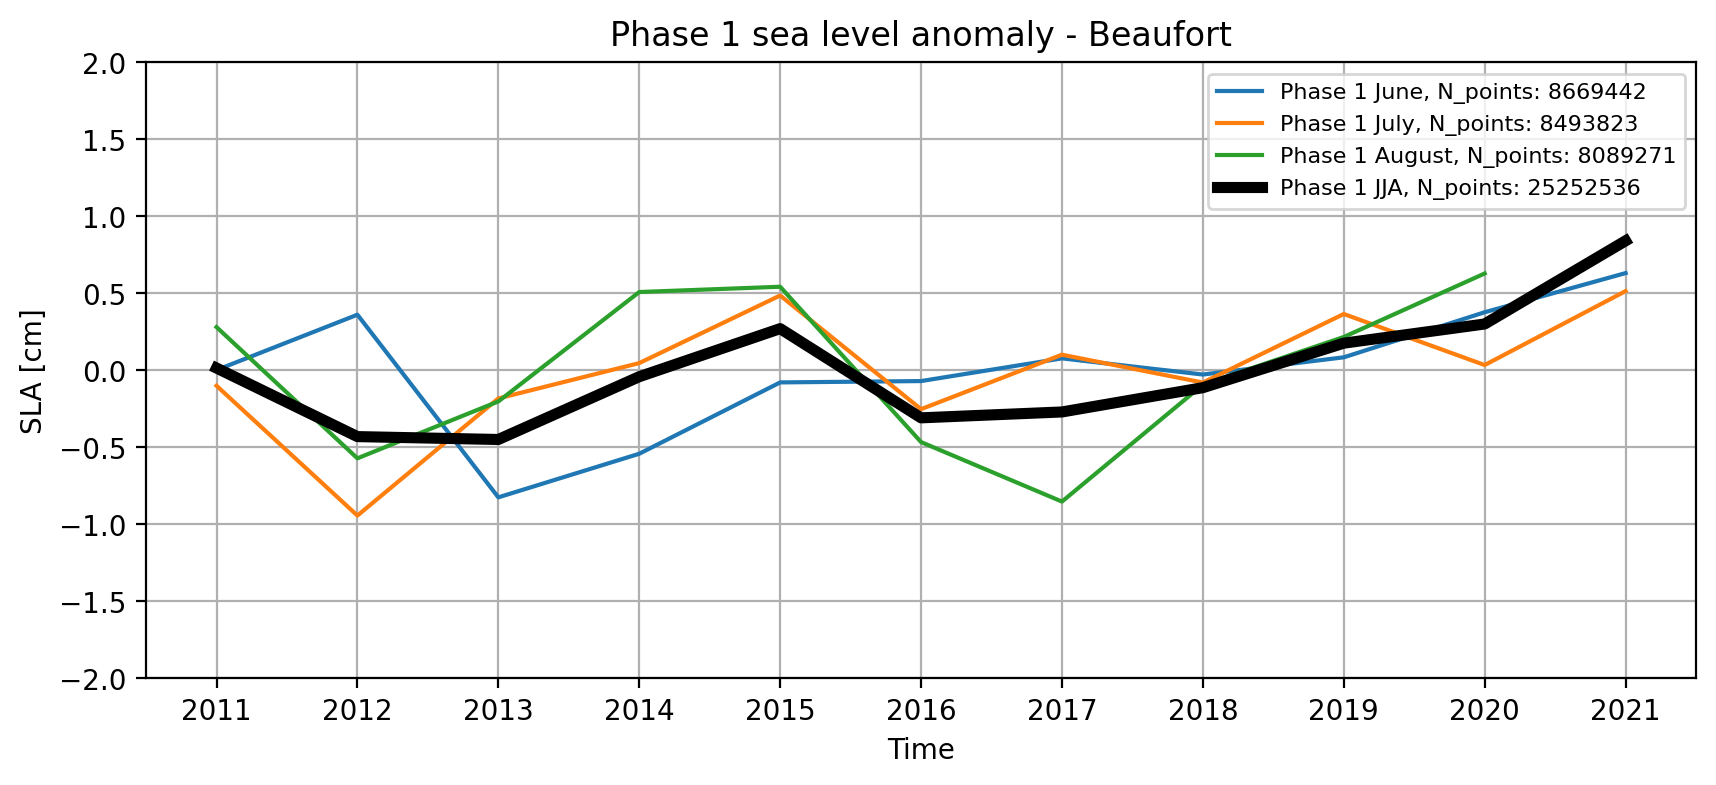

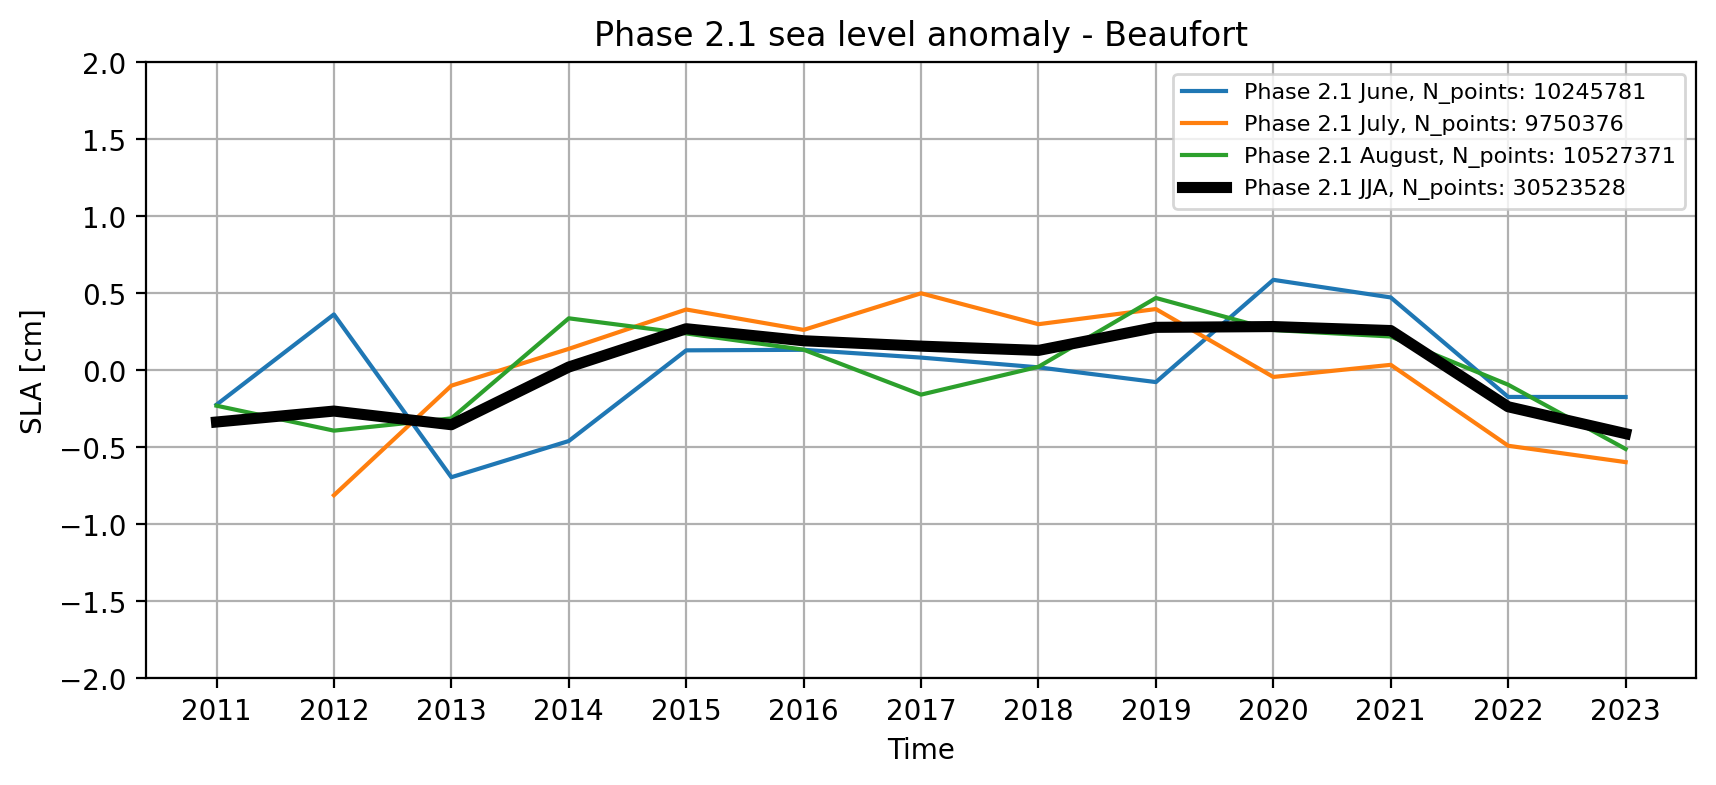

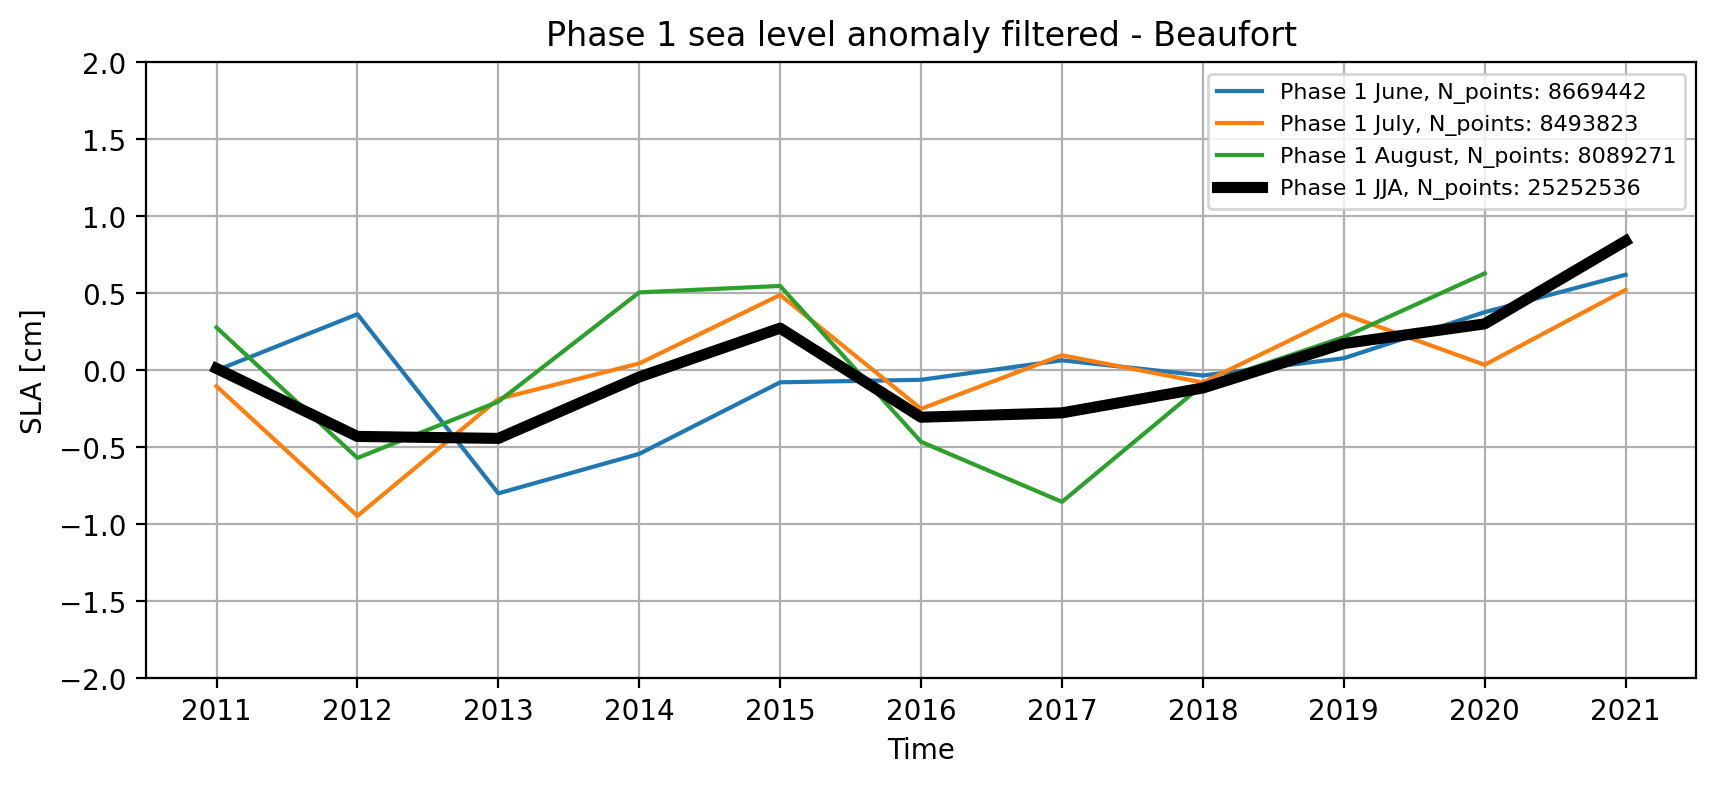

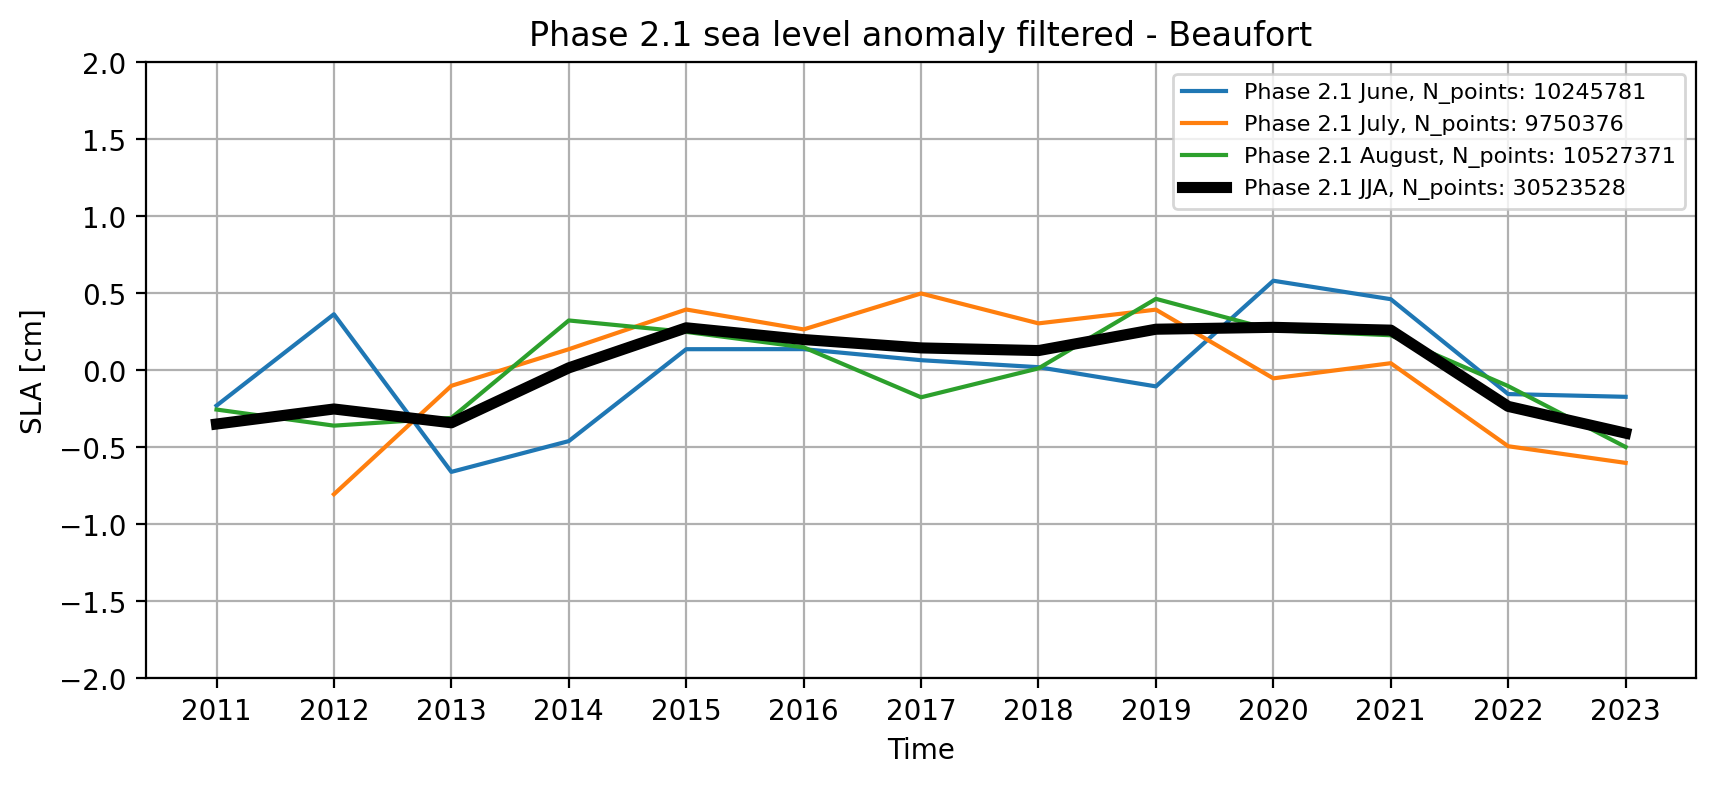

In [38]:
for idx, data_type in enumerate(data_types):
    plt.figure(figsize=(10,4), dpi=200)
    N_points1 = 0
    for data1, data2, month in zip(data_phase1, data_phase2, months):
        plt.plot(years1, data1[data_type]*100-data1[data_type].mean()*100, label=f"Phase 1 {month}, N_points: {data1.N_points}")
        N_points1 += data1.N_points
    plt.plot(years1, JJA_average1[idx]*100-np.nanmean(JJA_average1[idx])*100, label=f"Phase 1 JJA, N_points: {N_points1}", c="k", linewidth=4)
    plt.legend(fontsize=8)
    plt.xlabel("Time")
    plt.ylabel("SLA [cm]")
    plt.grid()
    plt.ylim(-2, 2)
    plt.title(f"Phase 1 {data_type.replace('_', ' ')} - {AREA}")
    plt.savefig(f"figures/discrepancy_investigation/{file_phase1.stem}_{data_type}_{MONTHS}.png")
    plt.show()


    plt.figure(figsize=(10,4), dpi=200)
    N_points2 = 0
    for data1, data2, month in zip(data_phase1, data_phase2, months):
        # if data_type == "sea_level_anomaly_filtered":
        #     plt.plot(years2, data2[data_type], label=f"Phase 2.1 {month}")
        #     plt.plot(years2, JJA_average2[idx], label="Phase 2.1 JJA", c="k", linewidth=4)
        # else:
        plt.plot(years2, data2[data_type]*100-np.nanmean(data2[data_type])*100, label=f"Phase 2.1 {month}, N_points: {data2.N_points}")
        N_points2 += data2.N_points
    plt.plot(years2, JJA_average2[idx]*100-np.nanmean(JJA_average2[idx])*100, c="k", linewidth=4, label=f"Phase 2.1 JJA, N_points: {N_points2}")
    
    plt.legend(fontsize=8)
    plt.grid()
    plt.ylim(-2, 2)
    plt.xlabel("Time")
    plt.ylabel("SLA [cm]")
    plt.title(f"Phase 2.1 {data_type.replace('_', ' ')} - {AREA}")
    plt.savefig(f"figures/discrepancy_investigation/{file_phase2.stem}_{data_type}_{MONTHS}.png")
    plt.show()
